<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:
# load the csv file
df=pd.read_csv('Life_Expectancy.csv')

# type your code here
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.100000,83,6,65,0.100000,584.259210,33736494,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,8,0,98,0,57.200000,1,98,98,0.100000,4575.763787,288914,1.200000,1.300000,0.761000,14.200000,77.500000
2,Algeria,Developing,19,21,95,63,59.500000,24,95,95,0.100000,4132.762920,39871528,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335,66,64,118,23.300000,98,7,64,1.900000,3695.793748,2785935,8.300000,8.200000,0.531000,11.400000,52.400000
4,Argentina,Developing,116,8,94,0,62.800000,9,93,94,0.100000,13467.123600,43417765,1.000000,0.900000,0.826000,17.300000,76.300000


In [3]:
df.columns


Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df['Adult_Mortality'], df['Expected'], 
                                                    random_state=1, test_size = 0.3)

print('X_train_slr', X_train_slr.shape)
print('y_train_slr', y_train_slr.shape)

# print dimension of test set
print('X_test_slr', X_test_slr.shape)
print('y_test_slr', y_test_slr.shape)

X_train_slr (86,)
y_train_slr (86,)
X_test_slr (38,)
y_test_slr (38,)


In [5]:
# convert the X_train to DataFrame
X_train_slr = pd.DataFrame(X_train_slr)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train_slr.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train_slr.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train_slr.head()

,intercept,Adult_Mortality
10,1.000000,129
112,1.000000,239
32,1.000000,92
82,1.000000,61
38,1.000000,119


In [6]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train_slr, X_train_slr).fit()

# print the summary output
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.15e-19
Time:                        21:20:58   Log-Likelihood:                -264.02
No. Observations:                  86   AIC:                             532.0
Df Residuals:                      84   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          82.6276      1.114     74.156      0.000      80.412      84.843
Adult_Mortality    -0.0677      0.006    -11.877      0.000      -0.079      -0.056
==============================================================================
Omnibus:                       55.463   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.534
Skew:                          -2.115   Prob(JB):                     9.55e-48
Kurtosis:                       9.521   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
import statsmodels
import statsmodels.api as sm

X=df['Income_Index']
y=df['Expected']


X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

ypred=model1.predict()
res=y-ypred
sum_res=np.sum(res)
errors=sum_res/df.shape[0]
print(sum_res,errors)

-2.7000623958883807e-13 -2.177469674103533e-15


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
X=df.iloc[:,[4,8,9]]
y=df['Expected']

In [9]:
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           0.000468
Time:                        21:20:59   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      0.000      51.010      64.966
Hepatitis      -0.1037      0.068     -1.528      0.129      -0.238       0.031
Polio           0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria      0.1613      0.082      1.969      0.051      -0.001       0.323
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
X=df.iloc[:,[4,8,9]]
y=df['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.00e-09
Time:                        21:20:59   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
X=df.iloc[:,2:16]
y=df['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
model1=sm.OLS(y,X).fit()
model1.summary()
np.round(model1.pvalues[model1.pvalues<0.05],6)

const               0.000000
Adult_Mortality     0.000000
Hepatitis           0.031500
 HIV                0.000157
Population          0.026100
Income_Index        0.000000
status_Developing   0.033838
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
X=df.iloc[:,[11,15]]
y=df['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
ypred=model1.predict(X)

In [13]:
SSR=np.sum((ypred-np.mean(y))**2)
SSE=np.sum((ypred-y)**2)
SST=SSR+SSE

print('SSR',SSR,'SSE',SSE,'SST',SST)

SSR 6292.571603999797 SSE 2527.2338798711357 SST 8819.805483870932


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
X=df.iloc[:,[15]]
y=df['Expected']

model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              5225.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                   1.28e-102
Time:                        21:20:59   Log-Likelihood:                         -471.89
No. Observations:                 124   AIC:                                      945.8
Df Residuals:                     123   BIC:                                      948.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Income_Index    99.7408      1.380     72.285      0.000      97.009     102.472
==============================================================================
Omnibus:                       10.401   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.305
Skew:                           0.719   Prob(JB):                      0.00351
Kurtosis:                       2.652   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1.conf_int()

,0,1
Income_Index,97.009477,102.472029


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
X=df.iloc[:,[2,3,7]]
y=df['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.29e-19
Time:                        21:21:00   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X=df.iloc[:,[2,3,7,12]]
y=df['Expected']
X=sm.add_constant(X)
model1=sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           8.93e-19
Time:                        21:21:00   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.019     78.813      0.000      78.289      82.325
Adult_Mortality      -0.0550      0.006     -9.929      0.000      -0.066      -0.044
Infant_Deaths         0.0886      0.050      1.788      0.076      -0.010       0.187
Underfive_Deaths     -0.0760      0.038     -1.975      0.051      -0.152       0.000
Population         4.736e-09   1.31e-08      0.361      0.718   -2.12e-08    3.07e-08
==============================================================================
Omnibus:                       54.418   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.042
Skew:                          -1.738   Prob(JB):                     8.69e-32
Kurtosis:                       6.949   Cond. No.                     8.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
X=df.iloc[:,1:17]
y=df['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.94e-36
Time:                        21:21:00   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
status_Developing     -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
from scipy.stats import shapiro
X=df.iloc[:,1:17]
y=df['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()

In [20]:
stat,p_val=shapiro(model_full.resid)
p_val

0.03209252282977104

In [21]:
#hence p-value<0.05 so, it is not normally distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
X=df.iloc[:,1:]
y=df['Expected']
X=sm.add_constant(X)

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+20
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:00   Log-Likelihood:                 2341.3
No. Observations:                 124   AIC:                            -4647.
Df Residuals:                     106   BIC:                            -4596.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.558e-12   3.23e-09      0.001      0.999   -6.39e-09     6.4e-09
Adult_Mortality     4.163e-16   2.16e-12      0.000      1.000   -4.28e-12    4.28e-12
Infant_Deaths       1.082e-15   1.74e-11   6.22e-05      1.000   -3.45e-11    3.45e-11
Hepatitis          -3.775e-14   1.52e-11     -0.002      0.998   -3.01e-11       3e-11
Measles            -1.793e-15   2.86e-14     -0.063      0.950   -5.84e-14    5.48e-14
 BMI                6.717e-15   1.06e-11      0.001      0.999    -2.1e-11     2.1e-11
Underfive_Deaths   -2.359e-16   1.28e-11  -1.85e-05      1.000   -2.53e-11    2.53e-11
Polio               9.992e-16   1.02e-11   9.76e-05      1.000   -2.03e-11    2.03e-11
Diphtheria          3.608e-15   1.86e-11      0.000      1.000   -3.69e-11     3.7e-11
 HIV               -6.661e-16   1.33e-10  -4.99e-06      1.000   -2.65e-10    2.65e-10
GDP                 5.373e-16   1.64e-14      0.033      0.974   -3.19e-14     3.3e-14
Population           3.37e-17    4.1e-18      8.221      0.000    2.56e-17    4.18e-17
Malnourished10_19  -2.887e-15   1.42e-10  -2.03e-05      1.000   -2.81e-10    2.81e-10
Malnourished5_9     4.996e-16   1.33e-10   3.76e-06      1.000   -2.63e-10    2.63e-10
Income_Index        1.421e-14   3.07e-09   4.64e-06      1.000   -6.08e-09    6.08e-09
Schooling           8.882e-16   1.62e-10   5.47e-06      1.000   -3.22e-10    3.22e-10
Expected               1.0000   4.51e-11   2.22e+10      0.000       1.000       1.000
status_Developing   1.066e-14   5.53e-10   1.93e-05      1.000    -1.1e-09     1.1e-09
==============================================================================
Omnibus:                      109.871   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.913
Skew:                          -3.253   Prob(JB):                    4.23e-193
Kurtosis:                      14.364   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#status and gdp has p_val greater than 0.05 so they are not significant.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
X=df.iloc[:,1:17]
y=df['Expected']

status_encode=pd.get_dummies(df['Status'],drop_first=True,prefix="status")
X=pd.concat([pd.DataFrame(X),status_encode],axis=1)
X1=X.drop('Status',axis=1)
model_full=sm.OLS(y,X1).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              940.0
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                   4.84e-108
Time:                        21:21:00   Log-Likelihood:                         -399.28
No. Observations:                 124   AIC:                                      830.6
Df Residuals:                     108   BIC:                                      875.7
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Adult_Mortality       -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths         -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis              0.0305      0.058      0.523      0.602      -0.085       0.146
Measles               -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
 BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths       0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                  0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria             0.0388      0.073      0.535      0.593      -0.105       0.183
 HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP                -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population         -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19     -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9        1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index          43.2384     11.241      3.846      0.000      20.956      65.520
Schooling              2.1667      0.601      3.608      0.000       0.976       3.357
status_Developing      7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [25]:
# load the csv file
# type your code here

df_fev=pd.read_csv('LungCapdata.csv')
df_fev.head()


,Age,Height,Gender,Smoke,FEV
0,9,57.000000,0,0,1.708000
1,8,67.500000,0,0,1.724000
2,7,54.500000,0,0,1.720000
3,9,53.000000,1,0,1.558000
4,9,57.000000,1,0,1.895000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
df_fev.corr()

,Age,Height,Gender,Smoke,FEV
Age,1.000000,0.791944,0.029144,0.404252,0.756459
Height,0.791944,1.000000,0.159029,0.280387,0.868135
Gender,0.029144,0.159029,1.000000,-0.075612,0.208415
Smoke,0.404252,0.280387,-0.075612,1.000000,0.245425
FEV,0.756459,0.868135,0.208415,0.245425,1.000000


In [27]:
# correlation is decent


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df_numeric_features_vif = df_fev.select_dtypes(include=[np.number])
df_numeric_features_vif.head()

,Age,Height,Gender,Smoke,FEV
0,9,57.000000,0,0,1.708000
1,8,67.500000,0,0,1.724000
2,7,54.500000,0,0,1.720000
3,9,53.000000,1,0,1.558000
4,9,57.000000,1,0,1.895000


In [29]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,36.682230,Age
1,28.262584,FEV
2,26.742597,Height
3,2.255633,Gender
4,1.343343,Smoke


In [30]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor Features
0    2.326514   Height
1    2.125582   Gender
2    1.142476    Smoke


In [31]:
# display the first 5 observations
df_numeric_features_vif.head()

,Height,Gender,Smoke
0,57.000000,0,0
1,67.500000,0,0
2,54.500000,0,0
3,53.000000,1,0
4,57.000000,1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
X=df_fev.iloc[:,0:3]
y=df_fev['FEV']
X=sm.add_constant(X)
model_full=sm.OLS(y,X).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          9.05e-210
Time:                        21:21:01   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4486      0.223    -19.952      0.000      -4.886      -4.011
Age            0.0614      0.009      6.766      0.000       0.044       0.079
Height         0.1046      0.005     21.986      0.000       0.095       0.114
Gender         0.1611      0.033      4.864      0.000       0.096       0.226
==============================================================================
Omnibus:                       23.453   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.454
Skew:                           0.189   Prob(JB):                     4.96e-11
Kurtosis:                       4.264   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_full.resid)


1.6360799139553126

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:ylabel='Density'>

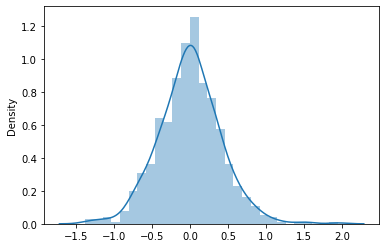

In [34]:
# type your code here
sns.distplot(model_full.resid)

In [35]:
model_full.resid.skew()

0.18992518216399762

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# type your code here
X = pd.concat([df_fev],axis=1)
y = df_fev["FEV"]
X=sm.add_constant(X)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.3, random_state=10)

final_model = sm.OLS(y_train,X_train).fit()

final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.069e+27
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:03   Log-Likelihood:                 13094.
No. Observations:                 457   AIC:                        -2.618e+04
Df Residuals:                     451   BIC:                        -2.615e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0    7.1e-14          0      1.000    -1.4e-13     1.4e-13
Age         1.735e-16   2.59e-15      0.067      0.947   -4.92e-15    5.27e-15
Height      1.367e-15   1.58e-15      0.865      0.388   -1.74e-15    4.47e-15
Gender       4.58e-16   8.61e-15      0.053      0.958   -1.65e-14    1.74e-14
Smoke       1.388e-16   1.45e-14      0.010      0.992   -2.84e-14    2.87e-14
FEV            1.0000   9.82e-15   1.02e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       10.409   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.257
Skew:                           0.237   Prob(JB):                       0.0161
Kurtosis:                       2.542   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
ypred=final_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
ms_error= mean_squared_error(y_test, ypred)
print("MSE: ", ms_error)
test_rmse = np.sqrt(ms_error)
print("RMSE: ",test_rmse)

MSE:  7.547140711082918e-27
RMSE:  8.687428106800608e-14


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [40]:
test_mae=mean_absolute_error(y_test,ypred)
print('MAE VALUE : ',test_mae)
test_mape=mape(y_test,ypred)
print('The MAPE value :',test_mape)

MAE VALUE :  8.64751023185573e-14
The MAPE value : 3.611594271088919e-12


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
X = sm.add_constant(X)
y = df_fev["FEV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
MLR_model = sm.OLS(y, X).fit()
print(MLR_model.summary())

train_pred = MLR_model.predict(X_train)
test_pred = MLR_model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.311e+28
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:21:04   Log-Likelihood:                 18746.
No. Observations:                 654   AIC:                        -3.748e+04
Df Residuals:                     648   BIC:                        -3.745e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.94e-15   5.95e-14      0.100      0.9

In [42]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = round(np.sqrt(train_mse), 4)
print("RMSE on train set: ",train_rmse)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("\n Root Mean Squared Error (RMSE) on test set: ", rmse_test)


RMSE on train set:  0.0

 Root Mean Squared Error (RMSE) on test set:  0.0
